In [51]:
import pathlib
from pathlib import Path

In [52]:
p = pathlib.Path("/home/yeep/project/py/AL-ACDC/data/ISIC/images")

In [53]:
len(list(p.glob("*.jpg")))

2594

In [54]:
from skimage.io import imread
import numpy as np

In [55]:
p = list(Path("/home/yeep/project/py/AL-ACDC/data/ISIC/images").glob("*.jpg"))
num_data = len(p)

In [56]:
num_data

2594

In [57]:
train, val = 0.7, 0.2
train, val = int(num_data * train), int(num_data * val)
test = num_data - train - val

In [58]:
train,val,test

(1815, 518, 261)

In [59]:
train, val, test = p[:train], p[train:train + val], p[train + val:train + val + test]

In [60]:
import shutil

In [63]:
for img in train:
    shutil.copy(img, "/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/train/images/"+img.name)
    mask_name = img.name[:-4]+"_segmentation.png"
    shutil.copy("/home/yeep/project/py/AL-ACDC/data/ISIC/mask/"+mask_name,"/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/train/mask/"+mask_name)

In [64]:
for img in val:
    shutil.copy(img, "/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/val/images/"+img.name)
    mask_name = img.name[:-4]+"_segmentation.png"
    shutil.copy("/home/yeep/project/py/AL-ACDC/data/ISIC/mask/"+mask_name,"/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/val/mask/"+mask_name)

In [65]:
for img in test:
    shutil.copy(img, "/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/test/images/"+img.name)
    mask_name = img.name[:-4]+"_segmentation.png"
    shutil.copy("/home/yeep/project/py/AL-ACDC/data/ISIC/mask/"+mask_name,"/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/test/mask/"+mask_name)

In [7]:
COLOR_TABLE = [(0, 0, 0), (222, 148, 80), (147, 71, 238), (187, 19, 208), (98, 43, 249), (166, 58, 136), (202, 45, 114),
            (103, 209, 30), (235, 57, 90), (18, 14, 75), (209,
                                                            156, 101), (230, 13, 166), (200, 150, 134),
            (242, 6, 88), (250, 186, 207), (144, 173,
                                            28), (232, 28, 225), (27, 245, 217), (82, 143, 39),
            (168, 222, 137), (121, 126, 101), (36, 222,
                                                26), (96, 52, 68), (14, 120, 179), (132, 237, 87),
            (119, 189, 121), (11, 51, 121), (6, 62, 102), (99,
                                                            164, 25), (203, 156, 88), (246, 212, 161),
            (216, 96, 246), (227, 98, 136), (243, 246,
                                            208), (171, 20, 38), (45, 57, 144), (35, 71, 130),
            (162, 204, 152), (80, 192, 81), (80, 68, 237), (54,
                                                            200, 25), (89, 126, 121), (229, 73, 134),
            (156, 249, 101), (253, 73, 35), (13, 54, 156), (187,
                                                            142, 9), (55, 33, 114), (160, 135, 174),
            (182, 187, 236), (64, 80, 115), (58, 218,
                                            247), (20, 107, 222), (7, 83, 48), (217, 193, 130),
            (233, 102, 178), (125, 226, 119), (39, 54,
                                                158), (106, 193, 45), (174, 98, 216), (21, 38, 98),
            (135, 147, 55), (211, 157, 122), (51, 128, 146), (181,
                                                                163, 89), (145, 87, 153), (239, 130, 152),
            (138, 71, 107), (170, 186, 210), (19, 196, 2), (248,
                                                            167, 29), (209, 182, 193), (177, 226, 23),
            (214, 223, 197), (74, 187, 51), (60, 12, 39), (94,
                                                            234, 136), (188, 154, 128), (155, 30, 210),
            (225, 40, 55), (36, 3, 222), (43, 31, 148), (109,
                                                        206, 121), (74, 209, 56), (184, 20, 170),
            (83, 152, 69), (43, 97, 155), (166, 13, 176), (97,
                                                            58, 36), (35, 109, 26), (21, 27, 163), (30, 181, 88),
            (27, 54, 18), (54, 96, 202), (59, 170, 176), (124,
                                                            32, 10), (60, 252, 230), (240, 75, 163),
            (110, 184, 56), (126, 204, 158), (210, 149,
                                                89), (83, 33, 33), (91, 156, 207), (159, 98, 144),
            (147, 67, 249), (65, 112, 172), (8, 94,
                                            186), (106, 252, 95), (56, 235, 12), (35, 16, 64),
            (198, 238, 160), (5, 204, 214), (30, 98, 242), (36,
                                                            253, 61), (73, 144, 213), (53, 130, 252),
            (243, 75, 41), (18, 150, 252), (40, 117, 236)]

In [8]:
import matplotlib.pyplot as plt

In [9]:
result = {
    "BALD": [
        0.7949878874273906,
        0.8047523753308262,
        0.8456031466604652,
        0.8577842384921908,
        0.8565784544883526,
        0.8553757702458419
    ],
    "RandomQuery": [
        0.7949878874273906,
        0.8444764181948035,
        0.8549386252210518,
        0.8631767605830143,
        0.8641802070864185,
        0.8638964802011064
    ],
    # "RandomQuery": [
    #     0.8097068005118587,
    #     0.8290666255554205,
    #     0.8442658438461283,
    #     0.8581701554164749,
    #     0.8587539874521978,
    #     0.8547130404264272
    # ],
    "CoresetQuery": [
        0.8063849992260631,
        0.8286873003049094,
        0.825366995639915,
        0.8349507035479515,
        0.8317334395913278,
        0.8465419798481748
    ],
    # "CoresetConsistencyQuery": [
    #     0.8351366993978115,
    #     0.8462143129173013,
    #     0.8496932343570333,
    #     0.8593387956669584,
    #     0.8617168907434947,
    #     0.8668361858387862
    # ],
    "FULL": [
        0.8958665792759225
    ],
    # "MGUnet_older": [
    #     0.8377726341492493,
    #     0.8474273189627606,
    #     0.8490021998822663,
    #     0.8605200138461766,
    #     0.8642757575479278,
    #     0.8647029632839456
    # ],
    # "CoresetQuery_1": [
    #     0.7949878874273906,
    #     0.8439552990577146,
    #     0.8470291814469971,
    #     0.8411838982931886,
    #     0.8388269798105028,
    #     0.8521388883055893
    # ],
    "MGUnet": [
        0.8331356871153353,
        0.8540594214562441,
        0.8692779786470202,
        0.8722664046560851,
        0.8773478217576145,
        0.8789796617522895
    ],
    # "MaskedFeatureCoresetQuery": [
    #     0.8063849992260631,
    #     0.8313573006215492,
    #     0.8403729556530858,
    #     0.8534620294139001,
    #     0.8673061511297535,
    #     0.865980115771285
    # ],
    "TAAL": [
        0.8061840649311546,
        0.8384789532953038,
        0.8345053992070275,
        0.8606313691725664,
        0.862063535741631,
        0.8673749743885497
    ],
    "LeastConfidence": [
        0.7949878874273906,
        0.8363103296951053,
        0.8471748210358688,
        0.8530881713444894,
        0.8637178341935088,
        0.8628148062943302
    ],
    # "SSL-RandomQuery": [
    #     0.8332266631376204,
    #     0.8577633808752483,
    #     0.8632062110345233,
    #     0.8684058003259972,
    #     0.8722614859292684,
    #     0.8739191138946526
    # ],
    "UncertaintyBatchQuery": [
        0.7949878874273906,
        0.8404020778760667,
        0.8493585012196633,
        0.8541643869427743,
        0.858613039841848,
        0.8613469331755387
    ]
}

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

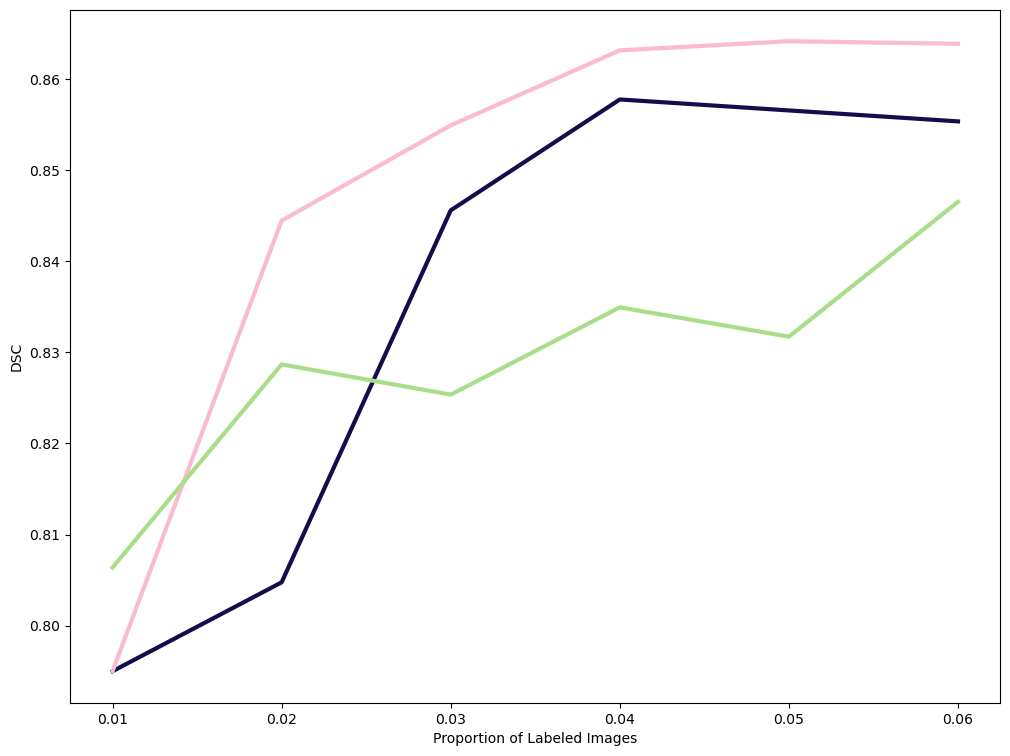

In [10]:
NUM_COLORS = len(result.keys())
fig, ax = plt.subplots(figsize=(12, 9))
x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
for i, (k, v) in enumerate(result.items()):
    ax.plot(x, v, label=k, linewidth=3.0, color=[
            i/255 for i in COLOR_TABLE[i*5+9]])
    ax.set_xlabel("Proportion of Labeled Images")
    ax.set_ylabel("DSC")
ax.legend()
plt.savefig(str("plot.png"))
plt.show()

# 绘制半监督图

In [3]:
import matplotlib.pyplot  as plt

In [4]:
x = [0.01,0.03,0.05,0.1]
Full_Supervised = [0.8833,0.8833,0.8833,0.8833]
Baseline = [0.7921,0.8127,0.8375,0.8557]
MGUnet = [0.7825,0.8271,0.852,0.8591]
URPC = [0.7635, 0.8164,0.8407,0.8521]

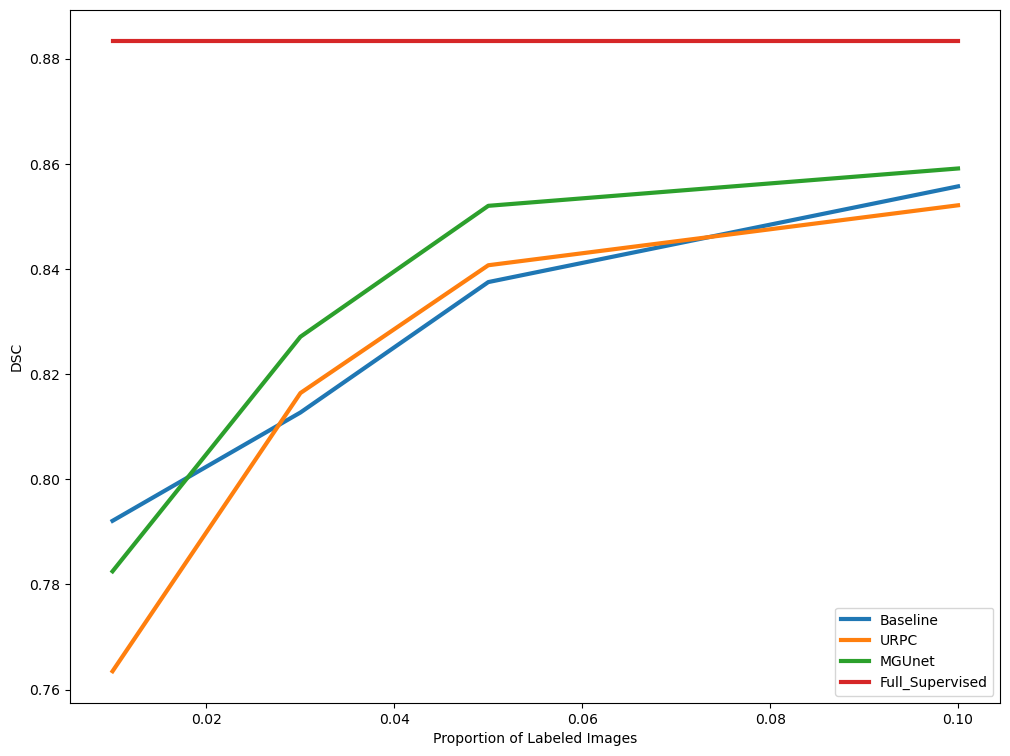

In [5]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(x, Baseline, label="Baseline", linewidth=3.0)

ax.plot(x, URPC, label="URPC", linewidth=3.0)

ax.plot(x, MGUnet, label="MGUnet", linewidth=3.0)

ax.plot(x, Full_Supervised, label="Full_Supervised", linewidth=3.0)
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("DSC")
ax.legend()
plt.savefig(str("plot.png"))
plt.show()

In [3]:
from skimage.io import imread
from matplotlib.pyplot import imshow
from skimage.color import label2rgb

In [5]:
lab = imread("/home/yeep/project/py/deeplearning/AL-ACDC/EXP/Cadis/FULL/out_dir/Video7_frame000400.png")

In [1]:
import numpy as np

In [2]:

np.array([1,2,3,4]).split(4)

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [3]:
d = {'1':2}

In [5]:
list(d.keys())

['1']